In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp
import numpy as np

In [124]:
data = pd.read_csv('../data/table.csv')
data.head()

,Tool,year_pub,num_citations,citation_per_year,category,package_manager,required_expertise,type_of_URL
0,a. Data Quality Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,iSeqQC,2020.0,0.0,0.000000,Data Quality Control,NaN,++,1.0
2,qsmooth2,2018.0,NaN,NaN,Data Quality Control,Bioconductor,++,1.0
3,FastQC,2018.0,75.0,37.500000,Data Quality Control,Anaconda,++,1.0
4,QC3,2014.0,64.0,10.666667,Data Quality Control,Anaconda,++,1.0


In [125]:
data['year_pub'].value_counts()

2014.0    39
2013.0    30
2015.0    30
2012.0    22
2011.0    21
2016.0    15
2010.0    14
2018.0    14
2019.0    13
2017.0    11
2009.0     3
2020.0     3
2008.0     2
Name: year_pub, dtype: int64

In [126]:
data['required_expertise'].value_counts()

++     98
+++    97
+      19
Name: required_expertise, dtype: int64

In [127]:
data['type_of_URL'].value_counts()

1.0    137
2.0     80
Name: type_of_URL, dtype: int64

In [128]:
data['package_manager'].value_counts()

Anaconda                  55
Anaconda, Bioconductor    20
Bioconductor               3
Anaconda, CRAN             2
Bioconductor, CRAN         1
Docker Hub                 1
pip                        1
CRAN                       1
Name: package_manager, dtype: int64

# Cumulative graph

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 10 Text yticklabel objects>)

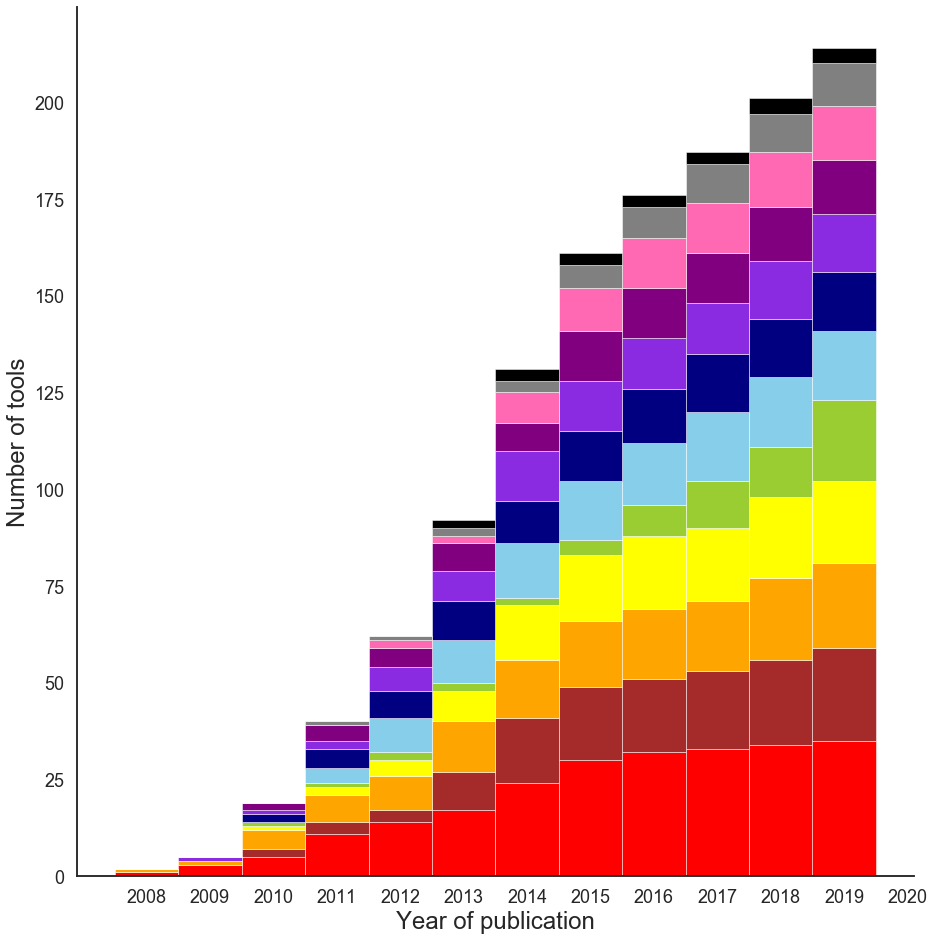

In [114]:
#data_year = pd.DataFrame(data.loc[:,['year_pub', 'Tool', 'category']])
#data_year.loc[:,'Tool_lower'] = data_year.loc[:,'Tool'].str.lower()
#data.loc[data['year_pub'].isnull(), :]
idx = range(2008, 2020)
by_year = data.groupby(['year_pub','category']).count()
by_year = by_year.xs('Tool', axis=1)
by_year = by_year.unstack(level = -1, fill_value=0)
by_year = by_year.cumsum()
by_year = by_year.reindex(idx, method='ffill')

sns.set_style('white')
sns.set_context('talk')

D = by_year['Transcriptome Quantification and Annotation'].to_list()
E = by_year['Differential Expression'].to_list()
B = by_year['Read Alignment'].to_list()
F = by_year['RNA Splicing'].to_list()
G = by_year['Immune Repertoire Profiling and Cell Deconvolution'].to_list()
J = by_year['Fusion Detection'].to_list()
C = by_year['Transcriptome assembly'].to_list()
A = by_year['Data Quality Control'].to_list()
K = by_year['Small RNA detection'].to_list()
L = by_year['Visualization Tools'].to_list()
H = by_year['Allele Specific Expression'].to_list()
I = by_year['Viral Detection'].to_list()


barWidth = 1
plt.bar(x, D, color='red', edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, E, bottom=D, color='brown', edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, B, bottom=[d+e for d,e in zip(D, E)], color='orange', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, F, bottom=[d+e+b for d,e,b in zip(D, E, B)], color='yellow', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, G, bottom=[d+e+b+f for d,e,b,f in zip(D, E, B, F)], color='yellowgreen', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, J, bottom=[d+e+b+f+g for d,e,b,f,g in zip(D,E,B,F,G)], color='skyblue', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, C, bottom=[d+e+b+f+g+j for d,e,b,f,g,j in zip(D,E,B,F,G,J)], color='navy', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, A, bottom=[d+e+b+f+g+j+c for d,e,b,f,g,j,c in zip(D,E,B,F,G,J,C)], color='blueviolet', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, K, bottom=[d+e+b+f+g+j+c+a for d,e,b,f,g,j,c,a in zip(D,E,B,F,G,J,C,A)], color='purple', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, L, bottom=[d+e+b+f+g+j+c+a+k for d,e,b,f,g,j,c,a,k in zip(D,E,B,F,G,J,C,A,K)], color='hotpink', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, H, bottom=[d+e+b+f+g+j+c+a+k+l for d,e,b,f,g,j,c,a,k,l in zip(D,E,B,F,G,J,C,A,K,L)], color='grey', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, I, bottom=[d+e+b+f+g+j+c+a+k+l+h for d,e,b,f,g,j,c,a,k,l,h in zip(D,E,B,F,G,J,C,A,K,L,H)], color='black', 
        edgecolor='white', width=barWidth, linewidth=.5)


plt.ylabel("Number of tools", fontsize=24)
plt.xlabel("Year of publication", fontsize=24)

sns.despine()

plt.xticks(range(2008, 2021), fontsize=18)
plt.yticks(fontsize=18)

In [115]:
idx_group = data.groupby('category')['Tool'].count().reset_index().sort_values('Tool', ascending=True)
idx_group

,category,Tool
10,Viral Detection,4
0,Allele Specific Expression,11
7,Small RNA detection,14
11,Visualization Tools,15
1,Data Quality Control,16
9,Transcriptome assembly,16
3,Fusion Detection,18
4,Immune Repertoire Profiling and Cell Deconvolu...,21
5,RNA Splicing,21
6,Read Alignment,22


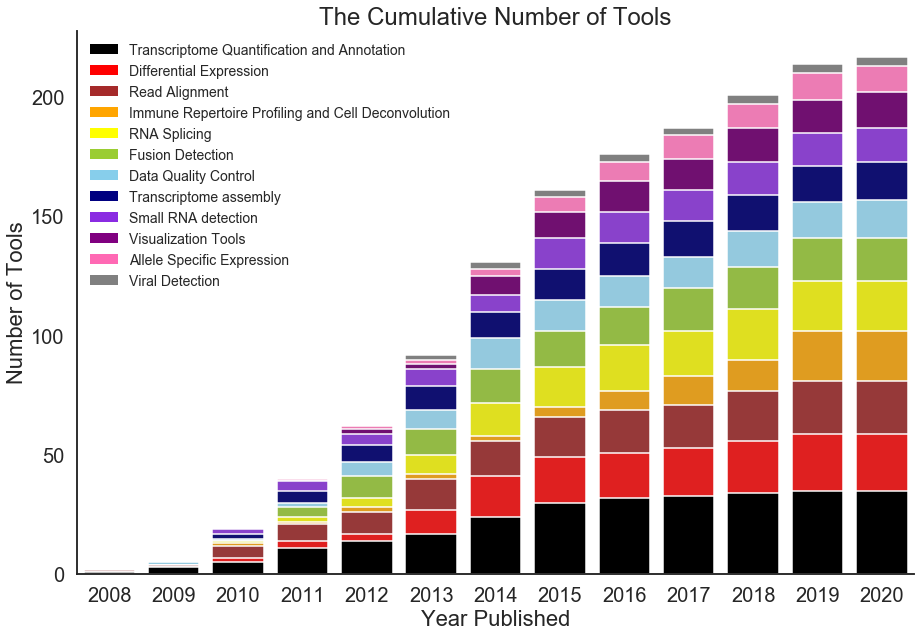

In [116]:
stacked_bar_data = pd.read_csv("../data/catyear.csv")
stacked_bar_data["total"] = stacked_bar_data.cumulation
stacked_bar_data["h"] = stacked_bar_data.cumulation-stacked_bar_data.I
stacked_bar_data["l"] = stacked_bar_data.h-stacked_bar_data.H
stacked_bar_data["k"] = stacked_bar_data.l-stacked_bar_data.L
stacked_bar_data["c"] = stacked_bar_data.k-stacked_bar_data.K
stacked_bar_data["a"] = stacked_bar_data.c-stacked_bar_data.C
stacked_bar_data["j"] = stacked_bar_data.a-stacked_bar_data.A
stacked_bar_data["f"] = stacked_bar_data.j-stacked_bar_data.J
stacked_bar_data["g"] = stacked_bar_data.f-stacked_bar_data.F
stacked_bar_data["b"] = stacked_bar_data.g-stacked_bar_data.G
stacked_bar_data["e"] = stacked_bar_data.b-stacked_bar_data.B
stacked_bar_data["d"] = stacked_bar_data.e-stacked_bar_data.E

sns.set_style("white")
sns.set_context({"figure.figsize": (15, 10)})

#Plot 
i = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.total, color="grey")
h = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.h, color="hotpink")
l = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.l, color="purple")
k = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.k, color="blueviolet")
c = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.c, color="navy")
a = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.a, color="skyblue")
j = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.j, color="yellowgreen")
f = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.f, color="yellow")
g = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.g, color="orange")
b = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.b, color="brown")
e = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.e, color="red")
d = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.d, color="black")

i = plt.Rectangle((0,0),1,1,fc="grey", edgecolor = 'none')
h = plt.Rectangle((0,0),1,1,fc='hotpink',  edgecolor = 'none')
l = plt.Rectangle((0,0),1,1,fc='purple',  edgecolor = 'none')
k = plt.Rectangle((0,0),1,1,fc='blueviolet',  edgecolor = 'none')
c = plt.Rectangle((0,0),1,1,fc='navy',  edgecolor = 'none')
a = plt.Rectangle((0,0),1,1,fc='skyblue',  edgecolor = 'none')
j = plt.Rectangle((0,0),1,1,fc='yellowgreen',  edgecolor = 'none')
f = plt.Rectangle((0,0),1,1,fc='yellow',  edgecolor = 'none')
g = plt.Rectangle((0,0),1,1,fc='orange',  edgecolor = 'none')
b = plt.Rectangle((0,0),1,1,fc='brown',  edgecolor = 'none')
e = plt.Rectangle((0,0),1,1,fc='red',  edgecolor = 'none')
d = plt.Rectangle((0,0),1,1,fc='black',  edgecolor = 'none')

legend=plt.legend([d,e,b,g,f,j,a,c,k,l,h,i], ['Transcriptome Quantification and Annotation','Differential Expression',
                                              'Read Alignment','Immune Repertoire Profiling and Cell Deconvolution',
                                              'RNA Splicing','Fusion Detection',
                                              'Data Quality Control','Transcriptome assembly','Small RNA detection',
                                              'Visualization Tools','Allele Specific Expression','Viral Detection'],
               loc='best', prop={'size':14})
legend.draw_frame(False)
plt.ylabel("Number of Tools",fontsize = 22)
plt.xlabel("Year Published",fontsize = 22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("The Cumulative Number of Tools",fontsize=24)
sns.despine()

plt.savefig('../figures/figure7aa.png', bbox_inches='tight')

# Domain-based required expertise

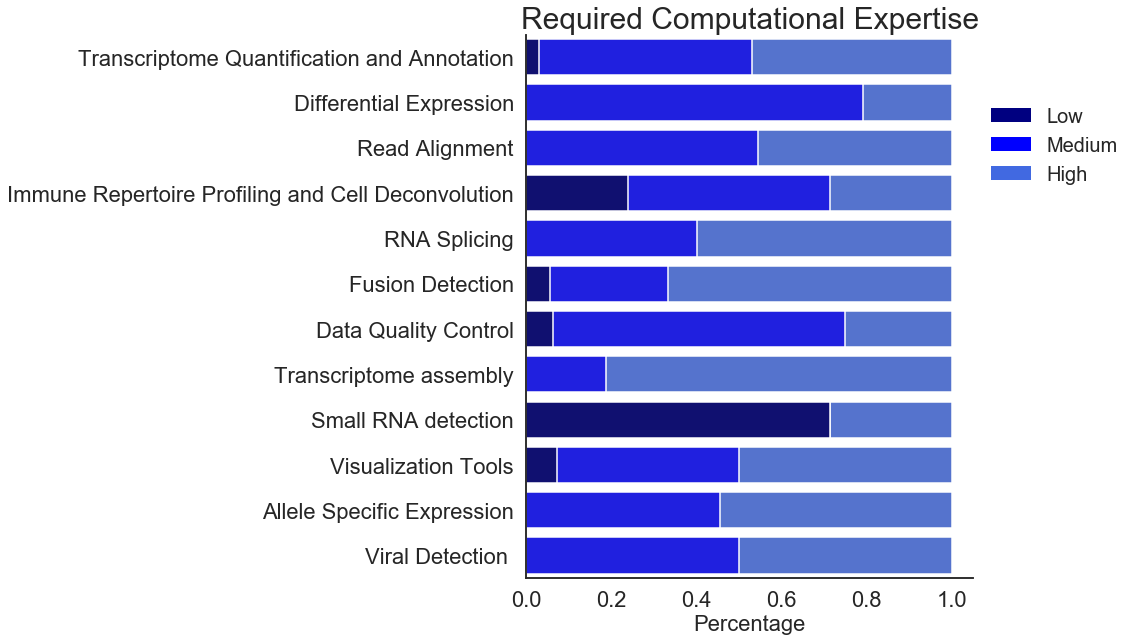

In [118]:
stacked_bar_data = pd.read_csv("../data/expertise_percent.csv")

sns.set_style("white")
sns.set_context({"figure.figsize": (8, 10)})

#Plot 1 - background - "total" (top)
top_plot = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.total, color = "royalblue")

#Plot 2 - overlay - "medium" 
medium_plot = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.medium + stacked_bar_data.easy, 
                          color = "b")

#Plot3 - overlay - "bottom"
bottom_plot = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.easy, color = "navy")


topbar = plt.Rectangle((0,0),1,1,fc="royalblue", edgecolor = 'none')
mediumbar = plt.Rectangle((0,0),1,1,fc='b',  edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc="navy", edgecolor = 'none')
l = plt.legend([bottombar, mediumbar, topbar], ['Low','Medium','High'],bbox_to_anchor=(1, .9),prop={'size':20})
l.draw_frame(False)
plt.title("Required Computational Expertise", fontsize = 30)

sns.despine()
bottom_plot.set_xlabel("Percentage")
bottom_plot.set_ylabel("")

#Set fonts to consistent size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] ):
    item.set_fontsize(22)
for items in (bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    items.set_fontsize(22)
    

plt.savefig('../figures/figure7c.png', bbox_inches='tight', pad_inches=.5)

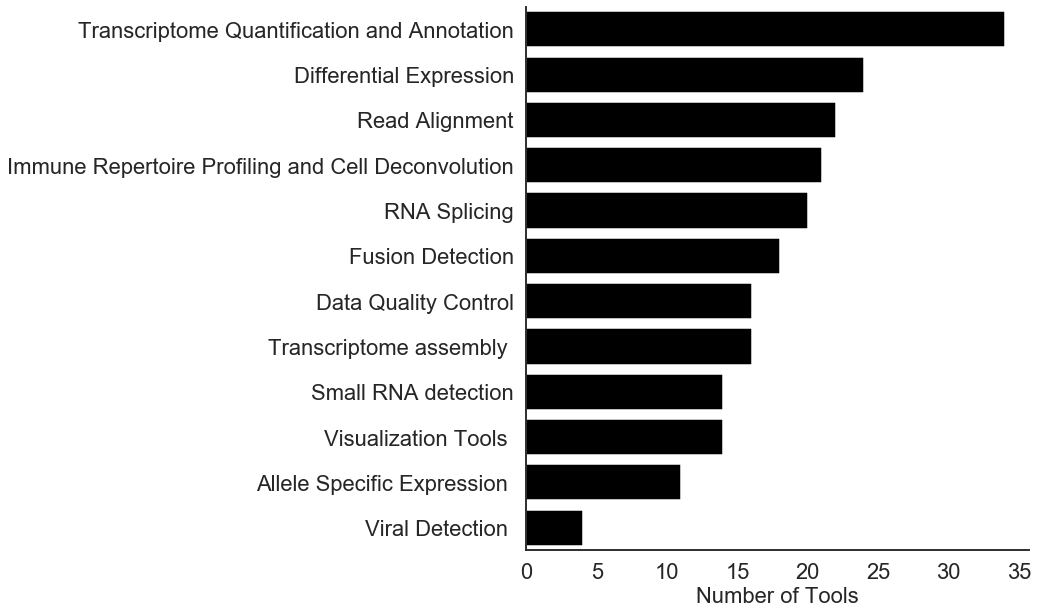

In [119]:
stacked_bar_data = pd.read_csv("../data/required_expertise.csv")
stacked_bar_data["total"] = stacked_bar_data.easy + stacked_bar_data.medium + stacked_bar_data.hard

sns.set_style("white")
sns.set_context({"figure.figsize": (9, 10)})

plot = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.total, color = "black")

plt.xlabel("Number of Tools",fontsize=22)
plt.ylabel("")
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
#plt.title("Number of Tools in Each Category", fontsize=30)
sns.despine()
plt.savefig('../figures/figure7b.png', bbox_inches='tight', pad_inches=.5)

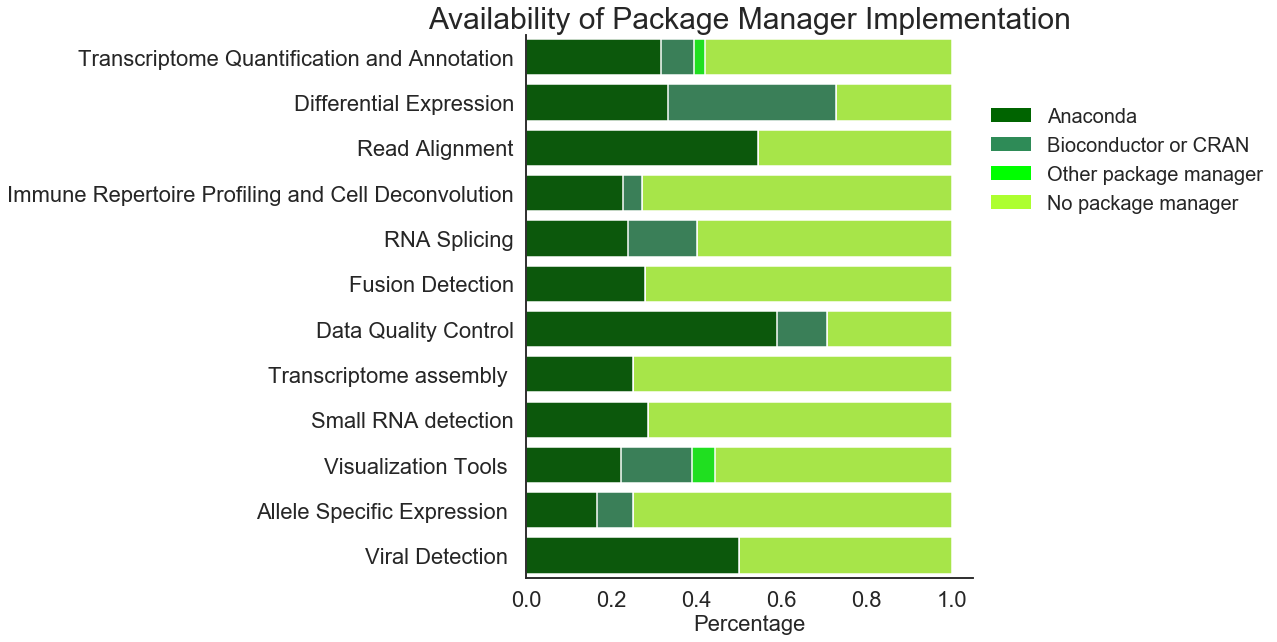

In [123]:
stacked_bar_data = pd.read_csv("../data/package_percent.csv")

sns.set_style("white")
sns.set_context({"figure.figsize": (8, 10)})

#Plot
total = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.total, color = "greenyellow")
other = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.total - stacked_bar_data.none, 
                   color = "lime")
b_c = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.Anaconda + stacked_bar_data.Bioconductor + stacked_bar_data.CRAN, 
                           color = "seagreen")
anaconda = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.Anaconda, color = "darkgreen")

total = plt.Rectangle((0,0),1,1,fc="greenyellow", edgecolor = 'none')
other = plt.Rectangle((0,0),1,1,fc='lime',  edgecolor = 'none')
b_c = plt.Rectangle((0,0),1,1,fc="seagreen", edgecolor = 'none')
anaconda = plt.Rectangle((0,0),1,1,fc="darkgreen", edgecolor = 'none')
legend = plt.legend([anaconda, b_c, other, total], ['Anaconda','Bioconductor or CRAN','Other package manager','No package manager'], 
                    bbox_to_anchor=(1, .9), prop={'size':20})
legend.draw_frame(False)
plt.title("Availability of Package Manager Implementation", fontsize = 30)

sns.despine()
plt.xlabel("Percentage",fontsize=22)
plt.ylabel("")
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
    

plt.savefig('../figures/figure7d.png', bbox_inches='tight', pad_inches=.5)

# Pie chart

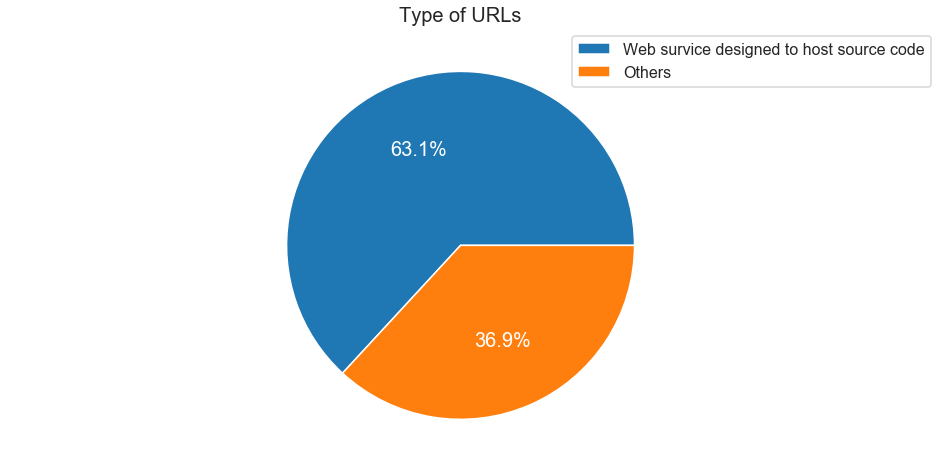

In [130]:
URL = pd.DataFrame({'ratio': [137, 80]}, index=['Web survice designed to host source code','Others'])
plot = URL.plot.pie(subplots=True, figsize=(8,8), autopct='%1.1f%%', textprops = {'color':"w"}, 
                              fontsize = 20)
plt.legend(loc='best', bbox_to_anchor=(0, .8, 1.6, .2), fontsize = 16)
plt.ylabel("", color = "black")
plt.title("Type of URLs", fontsize = 20)
plt.savefig('../figures/figure7g.png',bbox_inches='tight')

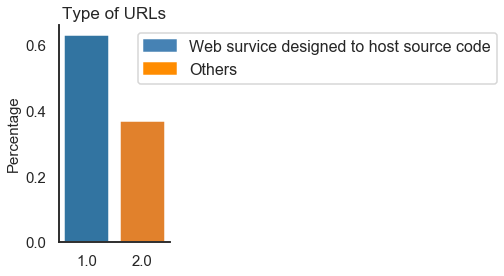

In [131]:
archival = pd.read_csv("../data/stability.csv")
sns.set_style("white")
sns.set_context({"figure.figsize": (2, 4)})

sns.barplot(x=archival.stability, y=archival.percent)

import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='steelblue', label='Web survice designed to host source code')
orange_patch = mpatches.Patch(color='darkorange', label='Others')

plt.legend(handles=[blue_patch, orange_patch],bbox_to_anchor=(0, .8, 4, .2),fontsize=16)


plt.xlabel("", fontsize=15)
plt.ylabel("Percentage", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Type of URLs",fontsize=17)
sns.despine()
plt.savefig('../figures/figure7gg.png',bbox_inches='tight')

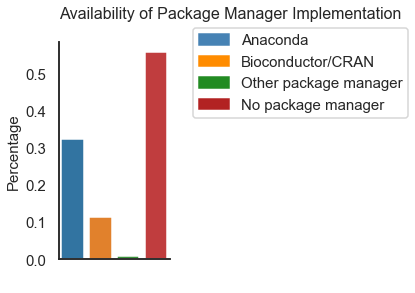

In [141]:
manager = pd.read_csv("../data/manager.csv")
sns.set_style("white")
sns.set_context({"figure.figsize": (2, 4)})

sns.barplot(x=manager.manager, y=manager.percent)
a = mpatches.Patch(color='steelblue', label='Anaconda')
b = mpatches.Patch(color='darkorange', label='Bioconductor/CRAN')
c = mpatches.Patch(color='forestgreen', label='Other package manager')
no = mpatches.Patch(color='firebrick', label='No package manager')
plt.legend(handles=[a, b, c, no],bbox_to_anchor=(.2, .9, 3, .2),fontsize=15)

plt.xlabel("", fontsize=15)
plt.ylabel("Percentage", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Availability of Package Manager Implementation\n",fontsize=16,loc="left")
sns.despine()
plt.savefig('../figures/figure7ff.png',bbox_inches='tight')

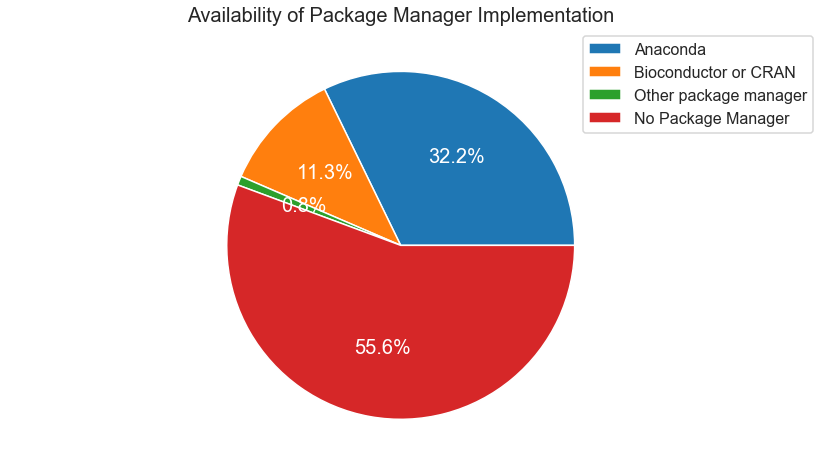

In [142]:
manager = pd.DataFrame({'Package Manager': [77,27,2,133]}, index=['Anaconda','Bioconductor or CRAN','Other package manager',
                                                                  'No Package Manager'])
plot = manager.plot.pie(subplots=True, figsize=(8,8), autopct='%1.1f%%', textprops = {'color':"w"}, 
                              fontsize = 20)
plt.legend(loc='best', bbox_to_anchor=(.9, 1),fontsize = 16)
plt.ylabel("", color = "black")
plt.title("Availability of Package Manager Implementation", fontsize = 20)
plt.savefig('../figures/figure7f.png',bbox_inches='tight')

# Citations

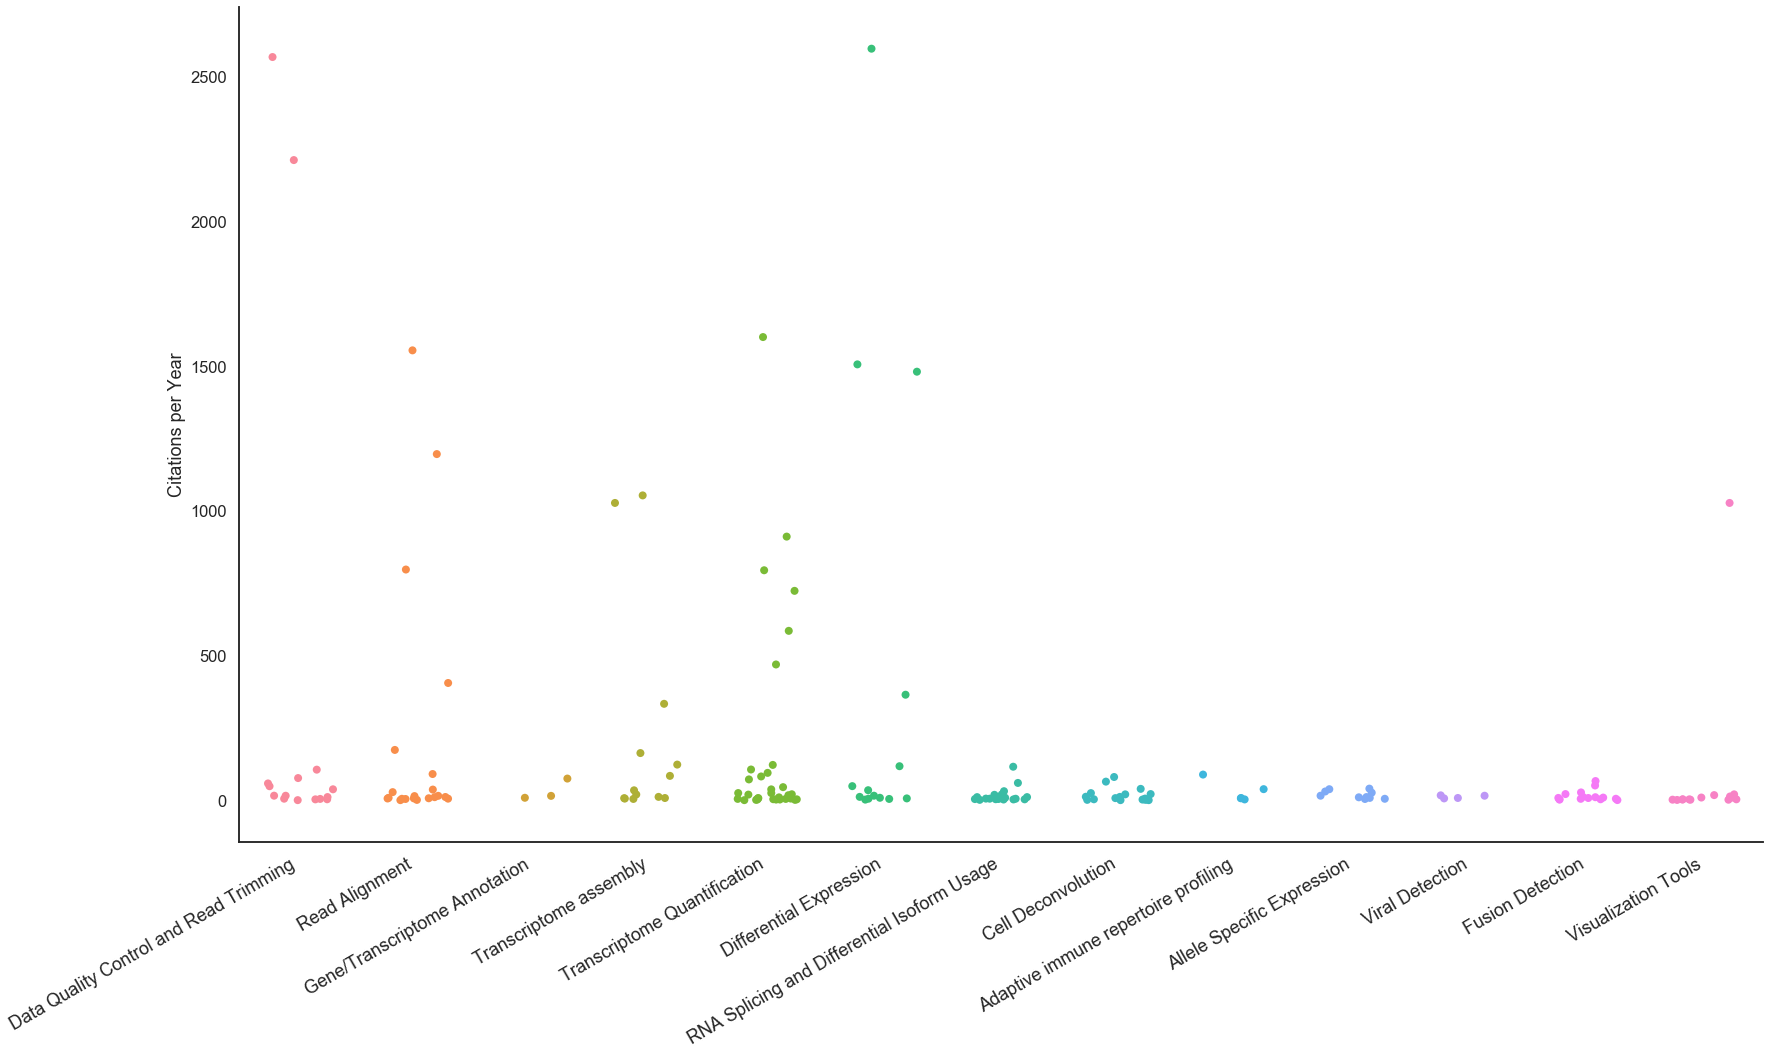

In [18]:
citation=pd.read_csv('../data/citation.csv')
plt.figure(figsize=(25,15))

sns.set_style('white')
sns.set_context('talk')


ax = sns.stripplot(data = citation, x = 'category', y = 'citation_per_year', 
                   order=['Data Quality Control and Read Trimming','Read Alignment','Gene/Transcriptome Annotation', 
                          'Transcriptome assembly','Transcriptome Quantification','Differential Expression',
                          'RNA Splicing and Differential Isoform Usage','Cell Deconvolution',
                          'Adaptive immune repertoire profiling','Allele Specific Expression',
                          'Viral Detection','Fusion Detection','Visualization Tools'],  
                   size=8, jitter=.3)

labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=30, ha="right", fontsize=18)
ax.set(xlabel = '', ylabel = "Citations per Year")
plt.tight_layout()
sns.despine()

plt.savefig('../figures/citation.png', bbox_inches='tight', pad_inches=.5)

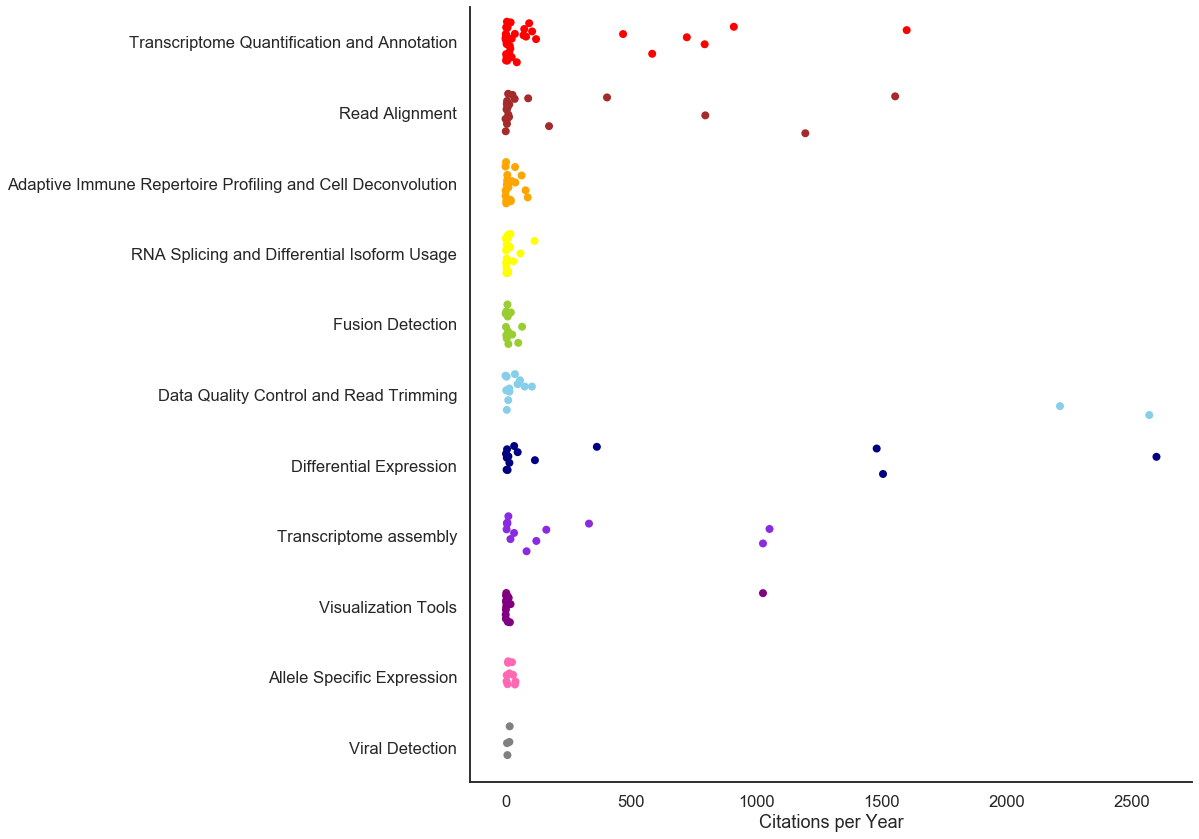

In [117]:
citation=pd.read_csv('../data/citation_sort.csv')
plt.figure(figsize=(17,12))

sns.set_style('white')
sns.set_context('talk')

color = ['red','brown','orange','yellow','yellowgreen','skyblue','navy','blueviolet','purple','hotpink','grey']
ax = sns.stripplot(data = citation, y = 'category', x = 'citation_per_year', 
                   order=['Transcriptome Quantification and Annotation','Read Alignment',
                          'Adaptive Immune Repertoire Profiling and Cell Deconvolution', 
                          'RNA Splicing and Differential Isoform Usage','Fusion Detection',
                          'Data Quality Control and Read Trimming',
                          'Differential Expression','Transcriptome assembly',
                          'Visualization Tools','Allele Specific Expression',
                          'Viral Detection'],  
                   palette=color, size=8, jitter=.3)
#plt.xscale('log')
labels = ax.get_xticklabels()
#ax.set_xticklabels(labels, rotation=50, ha="right", fontsize=18)
ax.set(ylabel = '', xlabel = "Citations per Year")
plt.tight_layout()
sns.despine()

plt.savefig('../figures/citation_sort.png', bbox_inches='tight', pad_inches=.5)